# Registration across Macaque MRI templates

**Authors:** Chris Klink (c.klink@nin.knaw.nl) & Nikoloz Sirmpilatze (niko.sirbiladze@gmail.com)               
**Last updated:** June 17, 2025     

**Requirements:**    
* _python_ >= 3.7
* _nipype_ >= 1.2.0
* _nilearn_ >= 0.5.2
    * Used only for visualisation
* _nibabel_ >= 2.3.3
* _joblib_ >= 0.14.1
    * Used only for parallel processing, not necessary when registrations are done serially
* _ANTs_ >= 2.4.0
    * _antsRegistration_,  _antsApplyTransforms_ and _antsAverageImages_ need to be in your path as executables    \
* _Numpy_

When using the faster GPU-based FireAnts:
* _fireANTS_     
    * [https://github.com/rohitrango/fireants](https://github.com/rohitrango/fireants)     
* _matplotlib_.pyplot    
* _SimpleITK_    
* _Pytorch_     

**Citation**: Sirmpilatze, Nikoloz and Klink, P. Christiaan (2020). RheMAP: Non-linear warps between common rhesus macaque brain templates (Version 1.2)[Data set]. Zenodo. https://doi.org/10.5281/zenodo.3786357     

The following templates are used: 
1. [NMT v1.2](https://afni.nimh.nih.gov/pub/dist/doc/htmldoc/nonhuman/macaque_tempatl/template_nmtv1.html)
2. [NMT v1.3](https://afni.nimh.nih.gov/pub/dist/doc/htmldoc/nonhuman/macaque_tempatl/template_nmtv1.html)
3. [NMT v2.0](https://afni.nimh.nih.gov/pub/dist/doc/htmldoc/nonhuman/macaque_tempatl/template_nmtv2.html)
4. [D99](https://afni.nimh.nih.gov/Macaque)
5. [INIA19](https://www.nitrc.org/projects/inia19/https://www.nitrc.org/projects/inia19/)
6. [MNI macaque](http://www.bic.mni.mcgill.ca/ServicesAtlases/Macaque)
7. [Yerkes19](https://github.com/Washington-University/NHPPipelines)
8. [ONPRC18](https://www.nitrc.org/projects/onprc18_atlas)     
9. [F99](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/XTRACT)
10. [MEBRAINS](https://doi.org/10.25493/5454-ZEA)       

Within this notebook, they are abbreviated as *NMTv12*, *NMTv13*, *NMTv20_sym*, *NMTv20_asym*, *NMTv20_05mm_sym_brain*, and *NMTv20_05mm_asym*, *D99*, *INIA*, *MNI*, *YRK*, *ONPRC18*, *F99*, and *MEBRAINS*.     

**NB!** We do not provide copies of the actual templates (licenses often forbids redistribution), but instead suggest you follow the links above and get them at the source. We do offer the warp files and warped templates that will be produced by this workflow. They can be downloaded from [Zenodo](https://doi.org/10.5281/zenodo.3786357) or [G-NODE GIN](https://gin.g-node.org/ChrisKlink/RheMAP). 

If you want to emulate this code, you can consider setting up your templates in the following folder structure:    

|--- RheMAP   
&emsp; |--- notebooks     
&emsp; |--- templates     
&emsp; &emsp; |--- D99     
&emsp; &emsp; &emsp; |--- D99_atlas_1.2a.nii.gz     
&emsp; &emsp; &emsp; |--- D99_atlas_1.2a_in_MNI.nii.gz     
&emsp; &emsp; &emsp; |--- D99_template.nii.gz      
&emsp; &emsp; |--- F99     
&emsp; &emsp; &emsp; |--- struct.nii.gz     
&emsp; &emsp; &emsp; |--- struct_brain.nii.gz 
&emsp; &emsp; |--- INIA   
&emsp; &emsp; &emsp; |--- inia19-t1-brain_truncated.nii.gz      
&emsp; &emsp; |--- MNI     
&emsp; &emsp; &emsp; |--- macaque_25_model-MNI_brain.nii.gz      
&emsp; &emsp; |--- MEBRAINS     
&emsp; &emsp; &emsp; |--- MEBRAINS_T1_masked.nii.gz      
&emsp; &emsp; |--- NMT     
&emsp; &emsp; &emsp; |--- NMT_v1.2     
&emsp; &emsp; &emsp; &emsp; |--- NMT_SS.nii.gz      
&emsp; &emsp; &emsp; |--- NMT_v1.3     
&emsp; &emsp; &emsp; &emsp; |--- NMT_SS.nii.gz     
&emsp; &emsp; &emsp; |--- NMT_v2.0     
&emsp; &emsp; &emsp; &emsp; |--- NMT_v2.0_asym_05mm_SS.nii.gz  
&emsp; &emsp; &emsp; &emsp; |--- NMT_v2.0_asym_SS.nii.gz  
&emsp; &emsp; &emsp; &emsp; |--- NMT_v2.0_sym_05mm_SS.nii.gz  
&emsp; &emsp; &emsp; &emsp; |--- NMT_v2.0_sym_SS.nii.gz  
&emsp; &emsp; |--- ONPRC18     
&emsp; &emsp; &emsp; |--- ONPRC18_T1W.nii.gz  
&emsp; &emsp; |--- YRK      
&emsp; &emsp; &emsp; |--- MacaqueYerkes19_T1w_0.5mm_brain.nii.gz       

After downloading the warp files and warped templates from [Zenodo](https://zenodo.org/record/3776856#.XqqfI3UzZjE), we suggest you include them like this:      

|--- RheMAP   
&emsp; |--- notebooks     
&emsp; |--- templates     
&emsp; |--- warps       
&emsp; &emsp; |--- final     
&emsp; &emsp; &emsp; |--- D99_to_INIA_CompositeWarp.nii.gz     
&emsp; &emsp; &emsp; |--- D99_to_MNI_CompositeWarp.nii.gz      
&emsp; &emsp; &emsp; |--- etc   
&emsp; &emsp; |--- linear     
&emsp; &emsp; &emsp; |--- D99_to_INIA_affine_0GenericAffine.mat     
&emsp; &emsp; &emsp; |--- D99_to_MNI_affine_0GenericAffine.mat     
&emsp; &emsp; &emsp; |--- etc   
&emsp; &emsp; |--- nonlinear     
&emsp; &emsp; &emsp; |--- D99_to_INIA_1InverseWarp.nii.gz     
&emsp; &emsp; &emsp; |--- D99_to_INIA_1Warp.nii.gz     
&emsp; &emsp; &emsp; |--- D99_to_MNI_1InverseWarp.nii.gz     
&emsp; &emsp; &emsp; |--- D99_to_MNI_1Warp.nii.gz  
&emsp; &emsp; &emsp; |--- etc   
&emsp; |--- warped_templates       
&emsp; &emsp; |--- final     
&emsp; &emsp; &emsp; |--- D99_in_INIA_composite.nii.gz     
&emsp; &emsp; &emsp; |--- D99_in_MNI_composite.nii.gz       
&emsp; &emsp; &emsp; |--- etc   
&emsp; &emsp; |--- linear     
&emsp; &emsp; &emsp; |--- D99_in_INIA_linear.nii.gz    
&emsp; &emsp; &emsp; |--- D99_in_MNI_linear.nii.gz          
&emsp; &emsp; &emsp; |--- etc   
&emsp; &emsp; |--- nonlinear     
&emsp; &emsp; &emsp; |--- D99_in_INIA_linear+SyN.nii.gz     
&emsp; &emsp; &emsp; |--- D99_in_MNI_linear+SyN.nii.gz     
&emsp; &emsp; &emsp; |--- etc  

Based on the warp files and warped templates you could of course reconstruct the original templates with something like the following.     

On the command line:     
```bash
antsApplyTransforms -i <TEMPLATE1_in_TEMPLATE2_composite.nii.gz> \
                    -r <TEMPLATE2_in_TEMPLATE1.nii.gz> \        
                    -o <RECONSTRUCTED_ORIGINAL_TEMPLATE1.nii.gz> \
                    -t [<TEMPLATE1_to_TEMPLATE2_CompositeWarp>,1] \
                    -n Linear \
                    -d 3
```    

In NiPype:     
```python
import nipype.interfaces.ants as ants    
ants.ApplyTransforms(
            input_image=<TEMPLATE1_in_TEMPLATE2_composite.nii.gz>,
            reference_image=<TEMPLATE2_in_TEMPLATE1.nii.gz>,        
            output_image=<RECONSTRUCTED_ORIGINAL_TEMPLATE1.nii.gz>,
            transforms=<TEMPLATE1_to_TEMPLATE2_CompositeWarp>,
            invert_transform_flags=True,
            interpolation='Linear',
            dimension=3)
```

The end goal is to generate warps between each unique pair of the templates (forward and backward).
* forwards (A to B, e.g. *NMTv1.2_to_D99*)
* backwards (B to A, e.g. *D99_to_NMTv1.2*)

![warps](RegisterTemplates.png)

## Step 0: Preparations

### 0a. Import required libraries

In [1]:
import os
import glob
import time
import shutil as sh
import nibabel as nb

from itertools import combinations
from matplotlib import pyplot as plt
import numpy as np

import nipype.interfaces.fsl as fsl # nipype interface for FSL
import nipype.interfaces.ants as ants # nipype interface for ANTs
from nilearn import plotting # Plotting function from nilearn

from fireants.io import Image, BatchedImages
from fireants.registration import AffineRegistration, GreedyRegistration
import matplotlib.pyplot as plt
import SimpleITK as sitk
import torch, os
torch.cuda.empty_cache()

### 0b. Define relative paths to template files

The skull-stripped isotropic volumetric images are used for registration.
* For **NMT**, **D99**, and **YRK** the provided skull-stripped brains were used
* In **INIA** the brain stem extends further down the spinal cord compared to the other temlplates, so the braisn stem was truncated at a level similar to the others
* No skull-stripped image was provided with **MNI**, so the brain was segmented semi-manually using ITK-SNAP
* For **YRK** we used the version provided together with [NHPPipelines](https://github.com/Washington-University/NHPPipelines)

In [2]:
# ============================================
# NB! THIS COULD BE DIFFERENT FOR EVERY USER
# ============================================
BASE_path     = os.path.dirname(os.getcwd()) + '/'   # repo base folder
print(BASE_path)

# these follow the directory structure as outline above
TEMPLATE_path = BASE_path + 'templates/'                   # templates base folder
NMTv12_path   = TEMPLATE_path + 'NMT/NMT_v1.2/'
NMTv13_path   = TEMPLATE_path + 'NMT/NMT_v1.3/'
NMTv20_path   = TEMPLATE_path + 'NMT/NMT_v2.0/'
D99_path      = TEMPLATE_path + 'D99/'
F99_path      = TEMPLATE_path + 'F99/'
INIA_path     = TEMPLATE_path + 'INIA/'
MNI_path      = TEMPLATE_path + 'MNI/'
YRK_path      = TEMPLATE_path + 'YRK/'
ONPRC18_path  = TEMPLATE_path + 'ONPRC18/'
MEBRAINS_path  = TEMPLATE_path + 'MEBRAINS/'

/media/DOCS/Documents/PRIME-DRE/RheMAP/GIT/RheMAP/


In [3]:
NMTv12_brain = NMTv12_path + 'NMT_SS.nii.gz'
NMTv13_brain = NMTv13_path + 'NMT_SS.nii.gz'
NMTv20_sym_brain = NMTv20_path + 'NMT_v2.0_sym_SS.nii.gz'
NMTv20_05mm_sym_brain = NMTv20_path + 'NMT_v2.0_sym_05mm_SS.nii.gz'
NMTv20_asym_brain = NMTv20_path + 'NMT_v2.0_asym_SS.nii.gz'
NMTv20_05mm_asym_brain = NMTv20_path + 'NMT_v2.0_asym_05mm_SS.nii.gz'
D99_brain    = D99_path + 'D99_template.nii.gz'
F99_brain    = F99_path + 'struct_brain.nii.gz'
INIA_brain   = INIA_path + 'inia19-t1-brain_truncated.nii.gz'
MNI_brain    = MNI_path + 'macaque_25_model-MNI_brain.nii.gz'
YRK_brain    = YRK_path + 'MacaqueYerkes19_T1w_0.5mm_brain.nii.gz'
ONPRC18_brain = ONPRC18_path + 'ONPRC18_T1W.nii.gz'
MEBRAINS_brain = MEBRAINS_path + 'MEBRAINS_T1_masked.nii.gz'

temp_names   = ['NMTv1.2', 'NMTv1.3',
                'NMTv2.0-sym','NMTv2.0-0.5mm-sym',
                'NMTv2.0-asym','NMTv2.0-0.5mm-asym',
                'D99', 'F99', 'INIA', 'MNI',
                'YRK', 'ONPRC18','MEBRAINS']
temp_brains  = [NMTv12_brain, NMTv13_brain, 
                NMTv20_sym_brain, NMTv20_05mm_sym_brain,
                NMTv20_asym_brain,NMTv20_05mm_asym_brain,
                D99_brain, F99_brain, INIA_brain, MNI_brain,
                YRK_brain, ONPRC18_brain, MEBRAINS_brain]

# strength of contrast in the plot_anat function ("dim")
contrasts = [0]*len(temp_brains) # create a list of zeros because this should exist
contrasts = [-1, 0, 0, 0, 0, 0, 0, -1, -1, -0.5, 0, 0, 0] # specify to improve display

In the following step you can create a subset of the templates to include in creating the warps. This can be useful when you add a new template and want to warp it to templates that have pre-existing warps (to each other). This way you can generate the new unique temlates without redoing the prexisting ones.

In [4]:
include_pairs_with = temp_names # all included
include_pairs_with = ['MEBRAINS']

The headers of NMT > v1.3 has both qform_code and sform_code set to 5. This is a relatively new definition ([see NITRC](https://www.nitrc.org/forum/forum.php?thread_id=10029&forum_id=1942)). Older version of nibabel (< 2.4.0) only recognized values 0-4 and reset the 5 to 0 which causes weird plotting artefacts (registrations will still be ok). As a workaround, you can use the code below to change the header value from 5 to something like 2 ('aligned'). A better option would of course be to update nibabel.
```
if NMTv13_brain in locals():
    sh.copyfile(NMTv13_brain,NMTv13_brain + '.bak'); # back up the original file
    img = nb.load(NMTv13_brain)
    hdr = img.header
    hdr.set_qform(hdr.get_qform(),code=2)
    hdr.set_sform(hdr.get_sform(),code=2)
    nb.save(img, NMTv13_brain) 
```

### 0c. Plot template brains

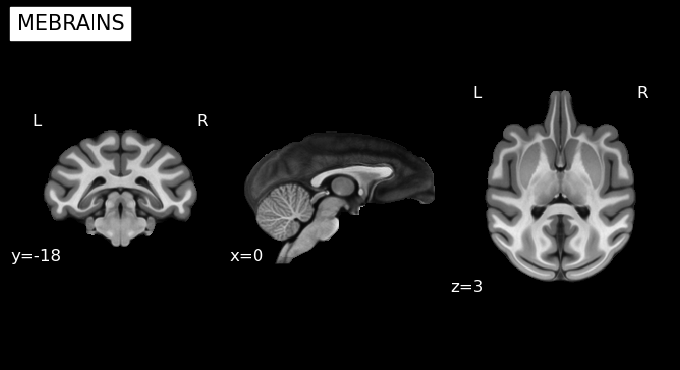

In [5]:
for name, brain,con in zip(temp_names, temp_brains, contrasts):
    if name in include_pairs_with:
        display = plotting.plot_anat(brain, display_mode='ortho', title=name, 
                  draw_cross=False, annotate=True, dim=con);
        plt.savefig(name + '_template.png'); # save png
        plt.draw()
        #display.close()

## Step 1: Perform registration
* This is performed using [FireANTs](https://github.com/rohitrango/fireants) **Affine** registration (12 degrees of freedom: 3 translations + 3 rotations + 3 scalings + 3 shears)
* It employs PyTorch and does the registration on the GPU (fast) but because of memory management we will have to do pairs of templates in a serial fashion rather than separate the the affine and non-linear steps. 

In [6]:
# compute initial alignment by center of mass
def get_com_init(imgfix,imgmov):
    fixed_sitk = sitk.ReadImage(imgfix)
    moving_sitk = sitk.ReadImage(imgmov)
    moving_sitk = sitk.Cast(moving_sitk, fixed_sitk.GetPixelID())
    init_tx = sitk.CenteredTransformInitializer(
        fixed_sitk,
        moving_sitk,
        sitk.AffineTransform(3),
        sitk.CenteredTransformInitializerFilter.GEOMETRY
    )
    init_tx = sitk.AffineTransform(init_tx)
    init_affine_np = np.eye(4)
    init_affine_np[:3, :3] = np.array(init_tx.GetMatrix()).reshape(3, 3)
    init_affine_np[:3, 3] = np.array(init_tx.GetTranslation())
    init_affine = torch.tensor(init_affine_np, dtype=torch.float32).unsqueeze(0)
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    init_affine = init_affine.to(device)
    return init_affine

In [8]:
for names, brains in zip(combinations(temp_names, 2), combinations(temp_brains, 2)):
    mov_pref = names[0]
    targ_pref = names[1]
    torch.cuda.empty_cache()
    
    if mov_pref in include_pairs_with or targ_pref in include_pairs_with:
        
        ##################################
        # LINEAR / AFFINE
        ##################################

        print('\nLinearly registering {0} to {1} template...'.format(mov_pref, targ_pref))

        mov_brain = brains[0]
        targ_brain = brains[1]

        # load the images
        imagefix = Image.load_file(targ_brain)
        imagemov = Image.load_file(mov_brain)
        batchfix = BatchedImages([imagefix])
        batchmov = BatchedImages([imagemov])
        scales = [4, 2, 1]  # scales at which to perform registration
        iterations = [200, 100, 50]
        
        # run affine reg
        init_affine = get_com_init(targ_brain,mov_brain)
        affine = AffineRegistration(scales, iterations, batchfix, batchmov, 
                                    optimizer='Adam', optimizer_lr=3e-3, cc_kernel_size=5,
                                    init_rigid=init_affine)
        transformed_images = affine.optimize(save_transformed=True)
        
        # save affine as ANTs registration files
        outbase = mov_pref + '_in_' + targ_pref
        txtfile = os.path.join(outbase + '_affine_0GenericAffine.txt')
        matfile = os.path.join(outbase + '_affine_0GenericAffine.mat')
        affine.save_as_ants_transforms(txtfile)
        !ConvertTransformFile 3 {txtfile} {matfile} --homogeneousMatrix

        # save affine moved file
        reference_img = sitk.ReadImage(targ_brain)
        moved = transformed_images[-1]
        moved_image_np = moved[0, 0].detach().cpu().numpy() 
        moved_sitk_image = sitk.GetImageFromArray(moved_image_np)
        moved_sitk_image.SetOrigin(reference_img.GetOrigin())
        moved_sitk_image.SetSpacing(reference_img.GetSpacing())
        moved_sitk_image.SetDirection(reference_img.GetDirection())
        outfile = os.path.join(outbase + '_linear.nii.gz')
        sitk.WriteImage(moved_sitk_image, outfile)

        ##################################
        # NONLINEAR
        ##################################
        del init_affine
        torch.cuda.empty_cache()

        print('\nNon-linearly registering {0} to {1} template...'.format(mov_pref, targ_pref))
        
        reg = GreedyRegistration(scales=[4, 2, 1], iterations=[200, 100, 25], 
            fixed_images=batchfix, moving_images=batchmov,
            cc_kernel_size=5, deformation_type='compositive', 
            smooth_grad_sigma=1, 
            optimizer='adam', optimizer_lr=0.5, 
            init_affine=affine.get_affine_matrix().detach(),
            )
        reg.optimize(save_transformed=False)
        warp = os.path.join(outbase + "_warp.pt")
        torch.save(reg.get_warped_coordinates(batchfix,batchmov), warp)
        antswarp = os.path.join(outbase + "_CompositeWarp.nii.gz")
        reg.save_as_ants_transforms(antswarp)

        reference_img = sitk.ReadImage(targ_brain)
        moved = reg.evaluate(batchfix, batchmov)
        moved_image_np = moved[0, 0].detach().cpu().numpy() 
        moved_sitk_image = sitk.GetImageFromArray(moved_image_np)
        moved_sitk_image.SetOrigin(reference_img.GetOrigin())
        moved_sitk_image.SetSpacing(reference_img.GetSpacing())
        moved_sitk_image.SetDirection(reference_img.GetDirection())
        outfile = os.path.join(outbase + '_composite.nii.gz')
        sitk.WriteImage(moved_sitk_image, outfile)

        del transformed_images, moved, moved_image_np
        torch.cuda.empty_cache()

        ##################################
        # NONLINEAR COMPONENT ONLY
        ##################################
        # free up memory by deleting old tensors 
        del affine, reg
        torch.cuda.empty_cache()

        print('\nGetting non-linear component only for {0} to {1} template...'.format(mov_pref, targ_pref))

        imgmov = os.path.join(outbase + '_linear.nii.gz')
        imagemov = Image.load_file(imgmov)
        batchmov = BatchedImages([imagemov])
        
        regsyn = GreedyRegistration(scales=[4, 2, 1], iterations=[200, 100, 25], 
            fixed_images=batchfix, moving_images=batchmov,
            cc_kernel_size=5, deformation_type='compositive', 
            smooth_grad_sigma=1, 
            optimizer='adam', optimizer_lr=0.5)
        regsyn.optimize(save_transformed=False)
        antswarp = os.path.join(outbase + "_1Warp.nii.gz")
        regsyn.save_as_ants_transforms(antswarp)

        reference_img = sitk.ReadImage(targ_brain)
        moved = regsyn.evaluate(batchfix, batchmov)
        moved_image_np = moved[0, 0].detach().cpu().numpy() 
        moved_sitk_image = sitk.GetImageFromArray(moved_image_np)
        moved_sitk_image.SetOrigin(reference_img.GetOrigin())
        moved_sitk_image.SetSpacing(reference_img.GetSpacing())
        moved_sitk_image.SetDirection(reference_img.GetDirection())
        outfile = os.path.join(outbase + '_linear+SyN.nii.gz')
        sitk.WriteImage(moved_sitk_image, outfile)

        del regsyn 
        torch.cuda.empty_cache()

        ##################################
        # INVERSE LINEAR / AFFINE
        ##################################

        print('\nLinearly registering {1} to {0} template...'.format(mov_pref, targ_pref))

        # load the images
        imagemov = Image.load_file(mov_brain)
        batchmov = BatchedImages([imagemov])
        scales = [4, 2, 1]  # scales at which to perform registration
        iterations = [200, 100, 50]
        
        # run inverse affine
        init_affine = get_com_init(mov_brain,targ_brain)
        affineinv = AffineRegistration(scales, iterations, batchmov, batchfix, 
                                       optimizer='Adam', optimizer_lr=3e-3, cc_kernel_size=5,
                                       init_rigid=init_affine)
        transformed_images_inv = affineinv.optimize(save_transformed=True)

        # save inv affine as ANTs registration files
        invoutbase = targ_pref + '_in_' + mov_pref + '_linear.nii.gz'
        txtfile = os.path.join(outbase + '_affine_0GenericAffine.txt')
        matfile = os.path.join(outbase + '_affine_0GenericAffine.mat')
        affineinv.save_as_ants_transforms(txtfile)
        !ConvertTransformFile 3 {txtfile} {matfile} --homogeneousMatrix

        # save inv affine moved file
        reference_img = sitk.ReadImage(mov_brain)
        moved = transformed_images_inv[-1]
        moved_image_np = moved[0, 0].detach().cpu().numpy() 
        moved_sitk_image = sitk.GetImageFromArray(moved_image_np)
        moved_sitk_image.SetOrigin(reference_img.GetOrigin())
        moved_sitk_image.SetSpacing(reference_img.GetSpacing())
        moved_sitk_image.SetDirection(reference_img.GetDirection())
        outfile = os.path.join(invoutbase + '_linear.nii.gz')
        sitk.WriteImage(moved_sitk_image, outfile)

        ##################################
        # NONLINEAR
        ##################################
        del init_affine
        torch.cuda.empty_cache()
        print('\nNon-linearly registering {1} to {0} template...'.format(mov_pref, targ_pref))

        mov_pref = names[0]
        targ_pref = names[1]
        mov_brain = '{0}_in_{1}_linear.nii.gz'.format(mov_pref, targ_pref)
        targ_brain = brains[1]
        
        reginv = GreedyRegistration(scales=[4, 2, 1], iterations=[200, 100, 25], 
            fixed_images=batchmov, moving_images=batchfix,
            cc_kernel_size=5, deformation_type='compositive', 
            smooth_grad_sigma=1, 
            optimizer='adam', optimizer_lr=0.5, 
            init_affine=affineinv.get_affine_matrix().detach())
        reginv.optimize(save_transformed=False)
        warpinv = os.path.join(invoutbase + "_warp.pt")
        torch.save(reginv.get_warped_coordinates(batchmov,batchfix), warpinv)
        antswarpinv = os.path.join(invoutbase + "_CompositeWarp.nii.gz")
        reginv.save_as_ants_transforms(antswarpinv)

        reference_img = sitk.ReadImage(mov_brain)
        movedinv = reginv.evaluate(batchmov, batchfix)
        movedinv_image_np = movedinv[0, 0].detach().cpu().numpy() 
        movedinv_sitk_image = sitk.GetImageFromArray(moved_image_np)
        movedinv_sitk_image.SetOrigin(reference_img.GetOrigin())
        movedinv_sitk_image.SetSpacing(reference_img.GetSpacing())
        movedinv_sitk_image.SetDirection(reference_img.GetDirection())
        outfile = os.path.join(invoutbase + '_composite.nii.gz')
        sitk.WriteImage(movedinv_sitk_image, outfile)

        del transformed_images_inv, moved, moved_image_np, movedinv, movedinv_image_np
        torch.cuda.empty_cache()
    
        ##################################
        # NONLINEAR COMPONENT ONLY
        ##################################
        # free up memory by deleting old tensors 
        del affineinv, reginv, batchmov, imagemov
        torch.cuda.empty_cache()

        print('\nGetting non-linear component only for {1} to {0} template...'.format(mov_pref, targ_pref))

        imgmov = os.path.join(outbase + '_linear.nii.gz')
        imagemov = Image.load_file(imgmov)
        batchmov = BatchedImages([imagemov])
        
        regsyninv = GreedyRegistration(scales=[4, 2, 1], iterations=[200, 100, 25], 
            fixed_images=batchmov, moving_images=batchfix,
            cc_kernel_size=5, deformation_type='compositive', 
            smooth_grad_sigma=1, 
            optimizer='adam', optimizer_lr=0.5)
        regsyninv.optimize(save_transformed=False)
        antswarp = os.path.join(outbase + "_1InverseWarp.nii.gz")
        regsyninv.save_as_ants_transforms(antswarp)

        reference_img = sitk.ReadImage(mov_brain)
        movedinv = regsyninv.evaluate(batchmov, batchfix)
        movedinv_image_np = movedinv[0, 0].detach().cpu().numpy() 
        movedinv_sitk_image = sitk.GetImageFromArray(moved_image_np)
        movedinv_sitk_image.SetOrigin(reference_img.GetOrigin())
        movedinv_sitk_image.SetSpacing(reference_img.GetSpacing())
        movedinv_sitk_image.SetDirection(reference_img.GetDirection())
        outfile = os.path.join(invoutbase + '_linear+SyN.nii.gz')
        sitk.WriteImage(movedinv_sitk_image, outfile)

        del regsyninv 
        del batchfix, batchmov, imagefix, imagemov
        torch.cuda.empty_cache()




Linearly registering NMTv1.2 to MEBRAINS template...
Parameter containing:
tensor([[[ 1.0000,  0.0000,  0.0000,  0.0500],
         [ 0.0000,  1.0000,  0.0000, -0.9500],
         [ 0.0000,  0.0000,  1.0000,  0.5000]]], device='cuda:0',
       requires_grad=True)


/home/chris/fireants/fireants/utils/imageutils.py:109: UserWarning: operator() sees varying value in profiling, ignoring and this should be handled by GUARD logic (Triggered internally at ../torch/csrc/jit/codegen/cuda/parser.cpp:3668.)
  image_smooth = separable_filtering(image+0, gaussians)
/home/chris/fireants/fireants/registration/affine.py:241: UserWarning: operator() profile_node %70 : int[] = prim::profile_ivalue[profile_failed="varying profile values"](%s.1)
 does not have profile information (Triggered internally at ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:105.)
  moving_image_blur = separable_filtering(moving_arrays, gaussians)
scale: 1, iter: 49/50, loss: -0.144787: 100%|██████████| 50/50 [00:05<00:00,  8.90it/s]
INFO:fireants.registration.affine:Saved transform to NMTv1.2_in_MEBRAINS_affine_0GenericAffine.txt



Non-linearly registering NMTv1.2 to MEBRAINS template...


scale: 1, iter: 24/25, loss: -0.203314: 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]



Getting non-linear component only for NMTv1.2 to MEBRAINS template...


scale: 1, iter: 24/25, loss: -0.213512: 100%|██████████| 25/25 [00:05<00:00,  4.84it/s]



Linearly registering MEBRAINS to NMTv1.2 template...
Parameter containing:
tensor([[[ 1.0000,  0.0000,  0.0000, -0.0500],
         [ 0.0000,  1.0000,  0.0000,  0.9500],
         [ 0.0000,  0.0000,  1.0000, -0.5000]]], device='cuda:0',
       requires_grad=True)


scale: 1, iter: 49/50, loss: -0.157071: 100%|██████████| 50/50 [00:18<00:00,  2.72it/s]
INFO:fireants.registration.affine:Saved transform to NMTv1.2_in_MEBRAINS_affine_0GenericAffine.txt



Non-linearly registering MEBRAINS to NMTv1.2 template...


  0%|          | 0/25 [00:00<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 84.00 MiB (GPU 0; 5.79 GiB total capacity; 3.40 GiB already allocated; 162.50 MiB free; 3.46 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

## Step 2: Visualize results
### 2a. Visualize linear registration results

In [ ]:
for names, brains in zip(combinations(temp_names, 2), combinations(temp_brains, 2)):
    if names[0] in include_pairs_with or names[1] in include_pairs_with:
        mov_pref = names[0]
        targ_pref = names[1]
        mov_brain = brains[0]
        targ_brain = brains[1]
        targ_index = temp_names.index(targ_pref)

        display = plotting.plot_anat(targ_brain, display_mode='ortho',
                            title='{0} edges on {1} volume'.format(mov_pref, targ_pref),
                            draw_cross=False, annotate=False, dim=contrasts[targ_index])
        brain = '{0}_in_{1}_linear.nii.gz'.format(mov_pref, targ_pref)
        #display.add_edges(brain)
        display.add_contours(brain)
        plt.savefig('Linear_{0}_on_{1}.png'.format(mov_pref, targ_pref))
        plt.draw()
        display.close()

### 2b: Visualize non-linear registration results

In [ ]:
for names, brains in zip(combinations(temp_names, 2), combinations(temp_brains, 2)):
    if names[0] in include_pairs_with or names[1] in include_pairs_with:
        mov_pref = names[0]
        targ_pref = names[1]
        targ_brain = brains[1]
        targ_index = temp_names.index(targ_pref)

        display = plotting.plot_anat(targ_brain, display_mode='ortho',
                            title='{0} edges on {1} volume'.format(mov_pref, targ_pref),
                            draw_cross=False, annotate=False, dim=contrasts[targ_index])
        brain = '{0}_in_{1}_linear+SyN.nii.gz'.format(mov_pref, targ_pref)
        #display.add_edges(brain)
        display.add_contours(brain)
        plt.savefig('Nonlinear_{0}_on_{1}.png'.format(mov_pref, targ_pref))
        plt.draw()
        display.close()

### 2c: Visualize composite registration results    

In [ ]:
for names, brains in zip(combinations(temp_names, 2), combinations(temp_brains, 2)):
    if names[0] in include_pairs_with or names[1] in include_pairs_with:
        mov_pref = names[0]
        targ_pref = names[1]
        mov_brain = brains[0]
        targ_brain = brains[1]
        mov_index = temp_names.index(mov_pref)
        targ_index = temp_names.index(targ_pref)

        display = plotting.plot_anat(targ_brain, display_mode='ortho',
                            title='{0} edges on {1} volume'.format(mov_pref, targ_pref),
                            draw_cross=False, annotate=False, dim=contrasts[targ_index])
        brain = '{0}_in_{1}_composite.nii.gz'.format(mov_pref, targ_pref)
        #display.add_edges(brain)
        display.add_contours(brain)
        plt.savefig('Composite_{0}_on_{1}.png'.format(mov_pref, targ_pref))
        plt.draw()
        display.close()

        display = plotting.plot_anat(mov_brain, display_mode='ortho',
                            title='{1} edges on {0} volume'.format(mov_pref, targ_pref),
                            draw_cross=False, annotate=False, dim=contrasts[mov_index])
        brain = '{1}_in_{0}_composite.nii.gz'.format(mov_pref, targ_pref)
        #display.add_edges(brain)
        display.add_contours(brain)
        plt.savefig('Composite_{1}_on_{0}.png'.format(mov_pref, targ_pref))
        plt.draw()
        plt.show()
        display.close()

### 4. Clean-up
* Create subfolders for linear and non-linear warps, and for the warped volumes
* Put all files in sensible subfolders

In [ ]:
os.makedirs(BASE_path + "warps/linear" , exist_ok=True)
os.makedirs(BASE_path + "warps/nonlinear" , exist_ok=True)
os.makedirs(BASE_path + "warps/final" , exist_ok=True)

[os.rename(os.getcwd() + '/' + f, BASE_path + "warps/linear/" + f) for f in glob.glob('*_affine_*Affine.mat')];
[os.rename(os.getcwd() + '/' + f, BASE_path + "warps/nonlinear/" + f) for f in glob.glob('*_to_*_1Warp.nii.gz')];
[os.rename(os.getcwd() + '/' + f, BASE_path + "warps/nonlinear/" + f) for f in glob.glob('*_to_*_1InverseWarp.nii.gz')];
[os.rename(os.getcwd() + '/' + f, BASE_path + "warps/final/" + f) for f in glob.glob('*_to_*_CompositeWarp.nii.gz')];
[os.remove(f) for f in glob.glob('*Affine.mat')]; # spurious linear warps (generated by nonlinear)

os.makedirs(BASE_path + "warped_templates/linear" , exist_ok=True)
os.makedirs(BASE_path + "warped_templates/nonlinear" , exist_ok=True)
os.makedirs(BASE_path + "warped_templates/final" , exist_ok=True)

[os.rename(os.getcwd() + '/' +  f, BASE_path + "warped_templates/linear/" + f) for f in glob.glob('*_in_*linear.nii.gz')];
[os.rename(os.getcwd() + '/' +  f, BASE_path + "warped_templates/nonlinear/" + f) for f in glob.glob('*_in_*linear+SyN.nii.gz')];
[os.rename(os.getcwd() + '/' +  f, BASE_path + "warped_templates/final/" + f) for f in glob.glob('*_in_*composite.nii.gz')];

os.makedirs(BASE_path + "images/templates" , exist_ok=True)
os.makedirs(BASE_path + "images/linear_reg" , exist_ok=True)
os.makedirs(BASE_path + "images/nonlinear_reg" , exist_ok=True)
os.makedirs(BASE_path + "images/all_warp_pairs" , exist_ok=True)

[os.rename(os.getcwd() + '/' + f, BASE_path + "images/templates/" + f) for f in glob.glob('*_template.png')];
[os.rename(os.getcwd() + '/' + f, BASE_path + "images/linear_reg/" + f) for f in glob.glob('Linear*.png')];
[os.rename(os.getcwd() + '/' + f, BASE_path + "images/nonlinear_reg/" + f) for f in glob.glob('Nonlinear*.png')];
[os.rename(os.getcwd() + '/' + f, BASE_path + "images/all_warp_pairs/" + f) for f in glob.glob('Composite*.png')];

[os.rename(os.getcwd() + '/' + f, BASE_path + "warps/linear/" + f) for f in glob.glob('*_affine_*Affine.txt')];
[os.rename(os.getcwd() + '/' + f, BASE_path + "warps/nonlinear/" + f) for f in glob.glob('*_to_*_warp.pt')];
[os.rename(os.getcwd() + '/' + f, BASE_path + "warps/nonlinear/" + f) for f in glob.glob('*_to_*_warpinv.pt')];
[os.rename(os.getcwd() + '/' + f, BASE_path + "warps/final/" + f) for f in glob.glob('*_to_*_CompositeWarp.nii.gz')];    

### 5. We will now create the average 'meta'-template in NMTv2.0 symmetric space (just because we can)
* Get all the templates (in NMTv2.0 sym space) & average them into a 'MetaTemplate'
* Plot the result

In [ ]:
wtp = BASE_path + "warped_templates/final/"
image_list = [NMTv20_sym_brain]
for file in os.listdir(wtp):
    if file.split('_')[2] == 'NMTv2.0-sym':
        image_list.append(wtp + file)

In [ ]:
avg = ants.AverageImages(
    dimension=3,
    output_average_image="MetaTemplate_in_NMTv2.0-sym.nii.gz",
    normalize=True,
    images=image_list
);
avg.run();

plotting.plot_anat("MetaTemplate_in_NMTv2.0-sym.nii.gz", display_mode='ortho', 
          title="MetaTemplate in NMTv2.0-sym", draw_cross=False, annotate=True, dim=con);
plt.savefig('MetaTemplate_in_NMTv2.0-sym.png')
plt.draw()

In [ ]:
os.makedirs(BASE_path + "warped_templates/metatemplate" , exist_ok=True)
[os.rename(os.getcwd() + '/' +  f, BASE_path + "warped_templates/metatemplate/" + f) for f in glob.glob('MetaTemplate*.nii.gz')];
os.makedirs(BASE_path + "images/metatemplate" , exist_ok=True)
[os.rename(os.getcwd() + '/' + f, BASE_path + "images/metatemplate/" + f) for f in glob.glob('MetaTemplate*.png')];